<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline

In [2]:
import copy
import datetime as dt
import os
import platform
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go

PROJECT_PATH = os.path.dirname(os.getcwd())
print(f'PROJECT_PATH = {PROJECT_PATH}')

if not PROJECT_PATH in sys.path:
    sys.path.append(PROJECT_PATH)
    
print('Platform:', platform.platform())
print('Python version:', sys.version)
print('numpy version:', np.__version__)
np.set_printoptions(threshold=sys.maxsize)

PROJECT_PATH = C:\Users\pietr\Documents\Azure\py_fatigue
Platform: Windows-10-10.0.25136-SP0
Python version: 3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]
numpy version: 1.21.5


In [3]:
#matplotlib tweaking
plt.rcParams['figure.figsize'] = (10.5/2.514/0.7, 4.5/2.514/0.7)
plt.rcParams["font.family"] = "Sans"
plt.rcParams["font.size"] = 10
plt.rcParams["axes.grid"] = True
plt.rcParams['grid.color'] = "#CCCCCC"
plt.rcParams['grid.linestyle'] = "-"
plt.rcParams['grid.color'] = "#DDDDDD"
plt.rcParams['grid.linestyle'] = "-"
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['lines.markersize'] = 3
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.labelleft'] = True

In [4]:
import py_fatigue.cycle_count.rainflow as rf
import py_fatigue.cycle_count.histogram as ht
from py_fatigue.cycle_count import CycleCount
from py_fatigue.mean_stress import MeanStress
from py_fatigue.stress_range import StressRange
import py_fatigue.cycle_count.cycle_count as fcc
import py_fatigue.utils as pfu

In [5]:
DATA_FOLDER = os.path.join(PROJECT_PATH, 'tests', 'data')

In [6]:
stress_signal = 1E6 * np.loadtxt(os.path.join(DATA_FOLDER, 'strain_signal.txt'))

In [7]:

SIGNAL = np.array([-3, 1, -1, 5, -1, 5, -1, 0, -4, 2, 1, 4, 1, 4, 3, 4, 2])
# fmt: off
DICT = {'nr_small_cycles': 0,
 'range_bin_lower_bound': 0.5,
 'range_bin_width': 1,
 'mean_bin_lower_bound': -0.75,
 'mean_bin_width': 0.5,
 'hist': [[1.0],
  [0.0, 1.0],
  [],
  [],
  [1.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  [0.0, 0.0, 1.0],
  [],
  [1.0]],
 'lg_c': [],
 'res': [[1.0, 8.0], [0.5, 9.0], [0.0, 8.0], [3.0, 2.0]],
 'res_sig': [-3, 5, -4, 4, 2]}
# fmt: on
CTS_1 = np.array([1. , 1. , 1. , 1. , 1. , 1. , 0.5, 0.5, 0.5, 0.5])
S_R_1 = np.array([1., 2., 1., 6., 3., 1., 8., 9., 8., 2.])
M_S_1 = np.array([-0.5,  0. ,  1.5,  2. ,  2.5,  3.5,  1. ,  0.5,  0. ,  3. ])
STRESS_RANGE_1 = StressRange(CTS_1, S_R_1, _bin_lb=0.5, bin_width=1)
MEAN_STRESS_1 = MeanStress(CTS_1, M_S_1, _bin_lb=-0.75, bin_width=0.5)

In [8]:
DICT.pop('res_sig')
assert "res_sig" not in DICT.keys()

In [9]:
cc_from_ts = CycleCount.from_timeseries(
    SIGNAL,
    timestamp=dt.datetime(2019, 1, 1, tzinfo=dt.timezone.utc),
    range_bin_lower_bound=0.5,
    range_bin_width=1,
    mean_bin_lower_bound=-0.75,
    mean_bin_width=0.5,
    name="Test_CC",
)
cc_from_ts_from_rf = CycleCount.from_rainflow(
    cc_from_ts.as_dict(), timestamp=dt.datetime(2019, 1, 1, tzinfo=dt.timezone.utc), name="Test_CC"
)
cc_from_rf = CycleCount.from_rainflow(
    DICT,
    timestamp=dt.datetime(2019, 1, 1, tzinfo=dt.timezone.utc),
    name="Test_CC"
)

In [17]:
cc_ts = CycleCount.from_rainflow(
    DICT,
    timestamp=dt.datetime(2022,10,1,tzinfo=dt.timezone.utc),
    name="Test_CC"
)

In [18]:
cc_ts + cc_from_ts_from_rf

TypeError: 01 Jan, 2019, 00:00 predates 01 Oct, 2022, 00:00. Timestamps must be sorted ascending.

In [19]:
CycleCount(**DICT)

TypeError: __init__() got an unexpected keyword argument 'mean_bin_lower_bound'

In [20]:
MEAN_STRESS_1.full

array([-0.5,  0. ,  1.5,  2. ,  2.5,  3.5])

In [21]:
np.allclose(cc_from_rf.full_cycles[:, 0], MEAN_STRESS_1.full)

True

In [22]:
cc_from_ts_from_rf.full_cycles[:, 0]

array([-0.5,  0. ,  1.5,  2. ,  2.5,  3.5])

In [23]:
cc_from_ts.as_dict(legacy_export=True)

{'nr_small_cycles': 0,
 'range_bin_lower_bound': 0.5,
 'range_bin_width': 1,
 'hist': [3.0, 1.0, 1.0, 0.0, 0.0, 1.0],
 'lg_c': [],
 'res': [8.0, 9.0, 8.0, 2.0],
 'res_sig': [-3, 5, -4, 4, 2]}

In [24]:
isinstance(cc_from_ts_from_rf, CycleCount)

False

In [25]:
cc_from_ts_from_rf == cc_from_rf

False

In [30]:
cc_from_ts.mean_stress

array([ 0. ,  2. , -0.5,  1. ,  1.5,  2.5,  3.5,  0.5,  0. ,  3. ])

In [31]:
cc_from_rf.mean_stress

array([-0.5,  0. ,  1.5,  2. ,  2.5,  3.5,  1. ,  0.5,  0. ,  3. ])

In [32]:
cc_from_rf.stress_range

array([1., 2., 1., 6., 3., 1., 8., 9., 8., 2.])

In [33]:
cc_from_ts_from_rf

,Test_CC
Cycle counting object,
"largest full stress range, MPa",6.0
"largest stress range, MPa",9.0
number of full cycles,6
number of residuals,4
number of small cycles,0
stress concentration factor,N/A
residuals resolved,False
mean stress-corrected,No


In [34]:
cc_from_ts_from_rf = CycleCount.from_rainflow(
    cc_from_ts.as_dict(), timestamp=dt.datetime(2019, 1, 1, tzinfo=dt.timezone.utc), name="Test_CC"
)
cc_from_ts_from_rf == cc_from_rf

False

In [35]:
SIGNAL_1 = np.array([-3, 1, -1, 5, -1, 5, -1, 0, -4, 2, 1, 4, 1, 4, 3, 4, 2])
SIGNAL_2 = SIGNAL_1
SIGNAL_3 = np.hstack([SIGNAL_1, SIGNAL_2])

In [74]:
cc_1 = CycleCount.from_timeseries(SIGNAL_1, name='Test_CC', timestamp=dt.datetime(2019, 1, 1, tzinfo=dt.timezone.utc))
cc_2 = CycleCount.from_timeseries(SIGNAL_2, name='Test_CC', timestamp=dt.datetime(2019, 1, 2, tzinfo=dt.timezone.utc))
cc_add = cc_1 + cc_2
cc_3b = cc_add.solve_lffd()
cc_3 = CycleCount.from_timeseries(SIGNAL_3, name='Test_CC', timestamp=dt.datetime(2019, 1, 1, tzinfo=dt.timezone.utc))

In [38]:
cc_3b.time_sequence

array([datetime.datetime(2019, 1, 1, 0, 0, tzinfo=datetime.timezone.utc),
       datetime.datetime(2019, 1, 2, 0, 0, tzinfo=datetime.timezone.utc)],
      dtype=object)

In [39]:
cc_add.time_sequence

array([datetime.datetime(2019, 1, 1, 0, 0, tzinfo=datetime.timezone.utc),
       datetime.datetime(2019, 1, 2, 0, 0, tzinfo=datetime.timezone.utc)],
      dtype=object)

In [40]:
cc_3b.time_sequence

array([datetime.datetime(2019, 1, 1, 0, 0, tzinfo=datetime.timezone.utc),
       datetime.datetime(2019, 1, 2, 0, 0, tzinfo=datetime.timezone.utc)],
      dtype=object)

In [41]:
del cc_1.residuals_sequence


In [42]:
cc_1.residuals_sequence = None
cc_1.residuals_sequence

In [43]:
cc_1 + cc_2

No residuals_sequence found on 01 January 2019, 00:00.


,Test_CC
Cycle counting object,
"largest full stress range, MPa",6.0
"largest stress range, MPa",9.0
number of full cycles,12
number of residuals,8
number of small cycles,0
stress concentration factor,N/A
residuals resolved,False
mean stress-corrected,No


In [44]:
_, RES_SIG_AFTER_1, _ = rf.rainflow(np.array([-3,  5, -4,  4,  2, -3,  5, -4,  4,  2]))

In [45]:
RES_SIG_AFTER_1

array([-3,  5, -4,  5, -4,  4,  2])

In [46]:
cc_3_scf = cc_3 * 3 * 2
cc_4_scf = 3 * cc_3 * 2

SCF already defined and set to 3.0.


In [47]:
cc_3_scf.stress_range

array([12., 36.,  6., 48.,  6., 18.,  6., 12., 42., 54., 36.,  6., 54.,
        6., 18.,  6., 54., 48., 12.])

In [48]:
np.divide(cc_3_scf.stress_range, cc_3.stress_range)

array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6.])

In [49]:
cc_4_scf

,"Test_CC, SCF=3, SCF=2"
Cycle counting object,
"largest full stress range, MPa",42.0
"largest stress range, MPa",54.0
number of full cycles,13
number of residuals,6
number of small cycles,0
stress concentration factor,6.0
residuals resolved,False
mean stress-corrected,No


(<Figure size 429.594x184.112 with 1 Axes>,
 <AxesSubplot:xlabel='Residuals sequence', ylabel='Residuals'>)

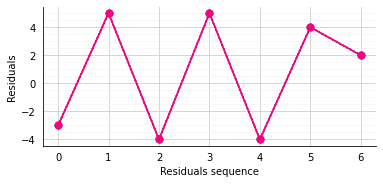

In [50]:
fig = plt.figure()
cc_3b.plot_residuals_sequence(fig, marker='o', markersize=7)
cc_3.plot_residuals_sequence(fig)

In [51]:
cc_3b.residuals_sequence

array([-3.,  5., -4.,  5., -4.,  4.,  2.])

In [52]:
res_rf, res_res_seq, _ = rf.rainflow(
        data=cc_add.residuals_sequence,
        extended_output=True,
    )

In [53]:
res_res_seq

array([-3,  5, -4,  5, -4,  4,  2])

In [54]:
cc_3b

,Test_CC
Cycle counting object,
"largest full stress range, MPa",7.0
"largest stress range, MPa",9.0
number of full cycles,13
number of residuals,6
number of small cycles,0
stress concentration factor,N/A
residuals resolved,True
mean stress-corrected,No


(<Figure size 429.594x184.112 with 1 Axes>,
 <AxesSubplot:xlabel='Residuals sequence', ylabel='Residuals'>)

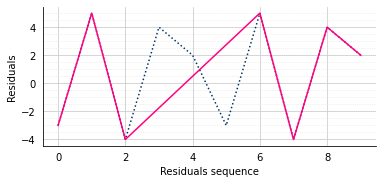

In [55]:
cc_add.plot_half_cycles_sequence()

In [56]:
cc_3

,Test_CC
Cycle counting object,
"largest full stress range, MPa",7.0
"largest stress range, MPa",9.0
number of full cycles,13
number of residuals,6
number of small cycles,0
stress concentration factor,N/A
residuals resolved,False
mean stress-corrected,No


(<Figure size 429.594x184.112 with 1 Axes>,
 <AxesSubplot:xlabel='Residuals sequence', ylabel='Residuals'>)

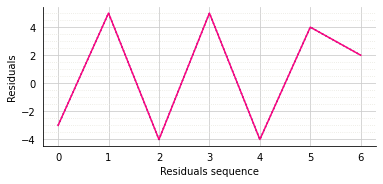

In [57]:
cc_3.plot_half_cycles_sequence()

In [58]:
cc_3

,Test_CC
Cycle counting object,
"largest full stress range, MPa",7.0
"largest stress range, MPa",9.0
number of full cycles,13
number of residuals,6
number of small cycles,0
stress concentration factor,N/A
residuals resolved,False
mean stress-corrected,No


In [59]:
rf.findrfc_astm(SIGNAL_1)

array([[ 1. ,  0. ,  1. ],
       [ 3. ,  2. ,  1. ],
       [ 0.5, -0.5,  1. ],
       [ 4. ,  1. ,  0.5],
       [ 0.5,  1.5,  1. ],
       [ 1.5,  2.5,  1. ],
       [ 0.5,  3.5,  1. ],
       [ 4.5,  0.5,  0.5],
       [ 4. ,  0. ,  0.5],
       [ 1. ,  3. ,  0.5]])

In [60]:
len(SIGNAL_1)

17

In [61]:
t = np.linspace(0, 7 * np.pi, 250)
np.sin(t) + 0.1 * np.sin(50 * t)

array([ 0.00000000e+00, -7.43352485e-03,  2.31603071e-01,  3.24845537e-01,
        2.53282247e-01,  4.18556565e-01,  6.03294180e-01,  5.31237492e-01,
        5.79621419e-01,  8.02780687e-01,  7.90332132e-01,  7.26448234e-01,
        9.12707741e-01,  9.87649417e-01,  8.59976617e-01,  9.43700933e-01,
        1.08753972e+00,  9.65374692e-01,  9.18697324e-01,  1.07387743e+00,
        1.01553572e+00,  8.60137399e-01,  9.55273785e-01,  9.81788752e-01,
        7.79158358e-01,  7.61056629e-01,  8.47138108e-01,  6.71668881e-01,
        5.29824589e-01,  6.16089774e-01,  5.22984895e-01,  2.95570991e-01,
        3.16520916e-01,  3.18760414e-01,  7.73389278e-02, -7.51303450e-03,
        5.70275230e-02, -1.23310812e-01, -3.09188825e-01, -2.44423620e-01,
       -3.16305085e-01, -5.52992446e-01, -5.49073674e-01, -5.11680639e-01,
       -7.23654035e-01, -8.11135062e-01, -7.08388171e-01, -8.26434266e-01,
       -9.89698368e-01, -8.88745846e-01, -8.79090188e-01, -1.06168730e+00,
       -1.02143856e+00, -

In [62]:
np.array([0, 1, 3, 4, 6, 7, 9, 11, 13, 14, 16, 18, 19, 21, 23, 25, 26, 28, 29,
        31, 33, 35, 36, 38, 39, 41, 43, 45, 46, 48, 50, 51, 53, 55, 56, 58, 60,
        61, 63, 65, 67, 68, 70, 71, 73, 75, 77, 78, 80, 81, 83, 85, 87, 88, 90,
         92, 93, 95, 97, 99, 100, 102, 103, 105, 107, 109, 110, 112, 113, 115,
         117, 119, 120, 122, 124, 125, 127, 129, 131, 132, 134, 135, 137, 139,
         141, 142, 144, 145, 147, 149, 151, 152, 154, 156, 157, 159, 161, 162,
         164, 166, 167, 169, 171, 173, 174, 176, 177, 179, 181, 183, 184, 186,
         187, 189, 191, 193, 194, 196, 198, 199, 201, 203, 205, 206, 208, 209,
         211, 213, 215, 216, 218, 219, 221, 223, 225, 226, 228, 230, 231, 233,
         235, 237, 238, 240, 241, 243, 245, 247, 248, 249])

array([  0,   1,   3,   4,   6,   7,   9,  11,  13,  14,  16,  18,  19,
        21,  23,  25,  26,  28,  29,  31,  33,  35,  36,  38,  39,  41,
        43,  45,  46,  48,  50,  51,  53,  55,  56,  58,  60,  61,  63,
        65,  67,  68,  70,  71,  73,  75,  77,  78,  80,  81,  83,  85,
        87,  88,  90,  92,  93,  95,  97,  99, 100, 102, 103, 105, 107,
       109, 110, 112, 113, 115, 117, 119, 120, 122, 124, 125, 127, 129,
       131, 132, 134, 135, 137, 139, 141, 142, 144, 145, 147, 149, 151,
       152, 154, 156, 157, 159, 161, 162, 164, 166, 167, 169, 171, 173,
       174, 176, 177, 179, 181, 183, 184, 186, 187, 189, 191, 193, 194,
       196, 198, 199, 201, 203, 205, 206, 208, 209, 211, 213, 215, 216,
       218, 219, 221, 223, 225, 226, 228, 230, 231, 233, 235, 237, 238,
       240, 241, 243, 245, 247, 248, 249])

In [63]:
rf.findextrema([0])

No level v = 0 crossings found in x


array([], dtype=int64)

In [64]:
rf.findtp([0])

array([], dtype=int64)

In [65]:
import pandas as pd

lst = [(1, 2, 0.875), (2, 1, 0.875), (0, 1, 1.0)]

items = ['Apple', 'Banana', 'Pear']

# lst_2 = [items[lst]]
print(pd.DataFrame.from_records(lst, columns=['First Item', 'Second Item', 'Score']))

   First Item  Second Item  Score
0           1            2  0.875
1           2            1  0.875
2           0            1  1.000


In [66]:
items_score_dict = {'First Item':[], 'Second Item':[], 'Score':[]}
for x in lst:
#     print((x[0], x[1], x[2]))
    items_score_dict['First Item'].append(items[x[0]])
    items_score_dict['Second Item'].append(items[x[1]])
    items_score_dict['Score'].append(x[1])
print(pd.DataFrame(items_score_dict))

  First Item Second Item  Score
0     Banana        Pear      2
1       Pear      Banana      1
2      Apple      Banana      1


In [67]:
CTS_1 = np.array([1. , 1. , 1. , 1. , 1. , 1. , 0.5, 0.5, 0.5, 0.5])
S_R_1 = np.array([1., 2., 1., 6., 3., 1., 8., 9., 8., 2.])
M_S_1 = np.array([-0.5, -0.5,  0. ,  0.5,  1. ,  1.5,  1.5,  2.5,  3. ,  3.5])
STRESS_RANGE_1 = StressRange(CTS_1, S_R_1, _bin_lb=0.5, bin_width=1)
MEAN_STRESS_1 = MeanStress(CTS_1, M_S_1, _bin_lb=-1, bin_width=1)

In [68]:
MEAN_STRESS_1.half

array([1.5, 2.5, 3. , 3.5])

In [69]:
df1=pd.DataFrame({'col1':['', 'element','element2'], 'col2':[20, 30, 43]})
df2=pd.DataFrame({'aaa':['', '',''], 'col1':['one', 'two', 'three'], 'col2':[5, 8, 6]})
df3=pd.DataFrame({'col1':[None, None, None], 'col2':[8, 9, 5]})
df4=pd.DataFrame({'whatever':[5,8,9], 'bbb':['','','']})

In [70]:
df3['col1'].empty

False

divide by zero encountered in true_divide
If mean stress correction is performed in the contest of long-term fatigue analysis, please perform the sum of multiple CycleCount instances prior mean stress correction (MSC).
In fact, applying the MSC before summing into long-term CycleCount instance results in non-conservative life estimates, as after MSC, low-frequency fatigue cannot be estimated accurately.


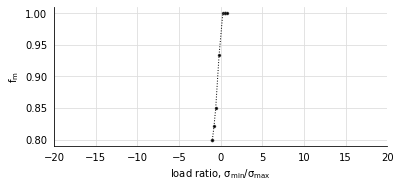

In [75]:
cc_1_cor = cc_1.mean_stress_correction(plot=True, detail_factor=0.6)

In [76]:
SIGNAL_0 = np.array([-3, 3, -3, 3, -3, 3, -3, 3, -3, 3, -3, 3, -3, 3, -3])
CC_TS_1 = CycleCount.from_timeseries(
    SIGNAL_0,
#     timestamp=TIMESTAMP_1,
    range_bin_lower_bound=0.5,
    range_bin_width=1,
    mean_bin_lower_bound=-0.75,
    mean_bin_width=0.5,
    name="Test_CC",
)

In [ ]:
CC_TS_1.stress_range

In [ ]:
len(CC_TS_1.count_cycle)

In [ ]:
import py_fatigue as pf

In [ ]:
import py_fatigue.damage as dam

In [79]:
df = cc_1.to_df()

In [81]:
df.miner.damage()

AttributeError: 'DataFrame' object has no attribute 'miner'